## Linear regression and gradient descent 
This is slightly modified code from Gideon chapter 4 code https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb

First, the imports

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


## The Data

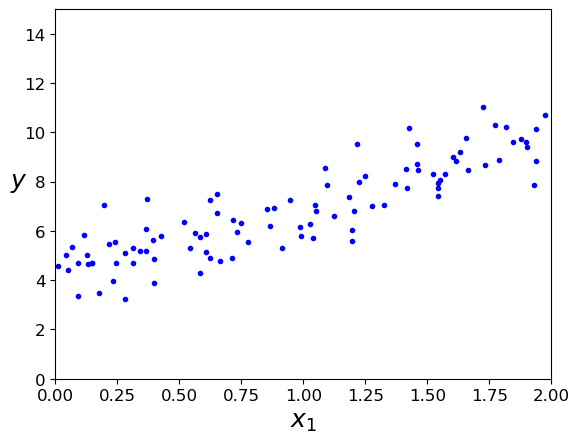

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

## Gradient descent

In [12]:
alfa = 0.1  # learning rate
n_iterations = 50
m = 100

w = np.random.randn(2, 1)  # random initialization
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

for iteration in range(n_iterations):
    loss = 1/m*(X_b.dot(w) -y).T.dot(X_b.dot(w) - y)
    print(loss)
    gradients = 2/m * X_b.T.dot(X_b.dot(w) - y)
    w = w - alfa * gradients

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(w)
y_predict


[[22.6346741]]
[[8.36998857]]
[[3.45209231]]
[[1.75493751]]
[[1.16770514]]
[[0.96307436]]
[[0.89042673]]
[[0.86339833]]
[[0.85222186]]
[[0.84663171]]
[[0.84308247]]
[[0.84034476]]
[[0.83798776]]
[[0.83585627]]
[[0.83389053]]
[[0.83206407]]
[[0.83036229]]
[[0.82877503]]
[[0.82729403]]
[[0.82591197]]
[[0.82462218]]
[[0.82341847]]
[[0.8222951]]
[[0.82124669]]
[[0.82026825]]
[[0.8193551]]
[[0.81850289]]
[[0.81770755]]
[[0.81696528]]
[[0.81627255]]
[[0.81562604]]
[[0.81502268]]
[[0.81445958]]
[[0.81393406]]
[[0.81344361]]
[[0.81298589]]
[[0.81255871]]
[[0.81216004]]
[[0.81178797]]
[[0.81144073]]
[[0.81111667]]
[[0.81081423]]
[[0.81053197]]
[[0.81026855]]
[[0.81002271]]
[[0.80979327]]
[[0.80957915]]
[[0.80937931]]
[[0.80919281]]
[[0.80901875]]


array([[4.12836727],
       [9.82174783]])

Code for plotting the various approximations to the best fit line as the gradient descent iterates

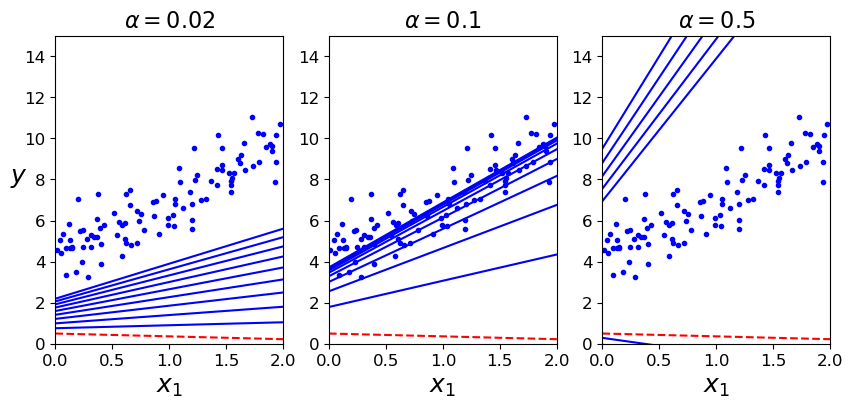

In [14]:
theta_path_bgd = []

def plot_gradient_descent(w, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 50
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(w)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(w) - y)
        w = w - eta * gradients
        if theta_path is not None:
            theta_path.append(w)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\alpha = {}$".format(eta), fontsize=16)

np.random.seed(42)
w = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(w, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(w, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(w, eta=0.5)

plt.show()